In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
temp = df
inpat = temp.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis = 'columns')

In [46]:
inpat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [47]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

In [48]:
inpat['sex_n'] = le_sex.fit_transform(inpat['Sex'])
inpat['Embarked_n'] = le_embarked.fit_transform(inpat['Embarked'])

In [49]:
inpat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,sex_n,Embarked_n
0,0,3,male,22.0,7.2500,S,1,2
1,1,1,female,38.0,71.2833,C,0,0
2,1,3,female,26.0,7.9250,S,0,2
3,1,1,female,35.0,53.1000,S,0,2
4,0,3,male,35.0,8.0500,S,1,2


In [54]:
inpat_new = inpat.drop(['Sex','Embarked'],axis = 'columns')
inpat_new.head()

,Survived,Pclass,Age,Fare,sex_n,Embarked_n
0,0,3,22.0,7.2500,1,2
1,1,1,38.0,71.2833,0,0
2,1,3,26.0,7.9250,0,2
3,1,1,35.0,53.1000,0,2
4,0,3,35.0,8.0500,1,2


In [60]:
target = inpat_new.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [68]:
input1 = inpat_new.drop('Survived',axis = 'columns')
input1.head()

,Pclass,Age,Fare,sex_n,Embarked_n
0,3,22.0,7.2500,1,2
1,1,38.0,71.2833,0,0
2,3,26.0,7.9250,0,2
3,1,35.0,53.1000,0,2
4,3,35.0,8.0500,1,2


In [72]:
input1.Age = input1.Age.fillna(input1.Age.mean())

In [73]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input1 ,target,test_size=0.2)

In [75]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
model.score(X_test,y_test)

0.7541899441340782

In [90]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [86]:
import numpy as np 
a = np.array([y_test])
a

array([[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0]], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[82, 18],
       [26, 53]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

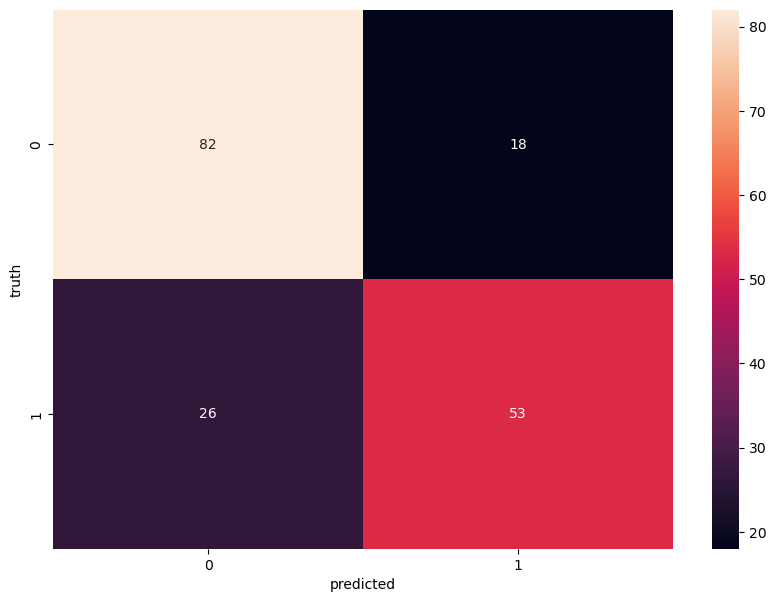

In [89]:
# using confusion matrix to find where our predition gone wrong
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')